In [1]:
#%matplotlib notebook

#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.basemap import Basemap as Basemap
import networkx as nx

In [ ]:
A_star = 83
Path = 160

x = [A_star, Path]

axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,200])

print x

n, bins, patches = plt.hist(x)

plt.show()

In [2]:
connections = []
connections.append(('VANCOUVER', 3, 'CALGARY'))
connections.append(('VANCOUVER', 1, 'SEATTLE'))
connections.append(('VANCOUVER', 1, 'SEATTLE'))
connections.append(('CALGARY', 4, 'SEATTLE'))
connections.append(('CALGARY', 4, 'HELENA'))
connections.append(('CALGARY', 6, 'WINNIPEG'))
connections.append(('SEATTLE', 6, 'HELENA'))
connections.append(('SEATTLE', 1, 'PORTLAND'))
connections.append(('SEATTLE', 1, 'PORTLAND'))
connections.append(('HELENA', 4, 'WINNIPEG'))
connections.append(('HELENA', 6, 'DULUTH'))
connections.append(('HELENA', 5, 'OMAHA'))
connections.append(('HELENA', 4, 'DENVER'))
connections.append(('HELENA', 3, 'SALT LAKE CITY'))
connections.append(('WINNIPEG', 6, 'SAULT ST. MARIE'))
connections.append(('WINNIPEG', 4, 'DULUTH'))
connections.append(('PORTLAND', 6, 'SALT LAKE CITY'))
connections.append(('PORTLAND', 5, 'SAN FRANCISCO'))
connections.append(('PORTLAND', 5, 'SAN FRANCISCO'))
connections.append(('DULUTH', 3, 'SAULT ST. MARIE'))
connections.append(('DULUTH', 6, 'TORONTO'))
connections.append(('DULUTH', 3, 'CHICAGO'))
connections.append(('DULUTH', 2, 'OMAHA'))
connections.append(('DULUTH', 2, 'OMAHA'))
connections.append(('OMAHA', 4, 'CHICAGO'))
connections.append(('OMAHA', 1, 'KANSAS CITY'))
connections.append(('OMAHA', 1, 'KANSAS CITY'))
connections.append(('OMAHA', 4, 'DENVER'))
connections.append(('DENVER', 4, 'KANSAS CITY'))
connections.append(('DENVER', 4, 'KANSAS CITY'))
connections.append(('DENVER', 4, 'OKLAHOMA CITY'))
connections.append(('DENVER', 2, 'SANTA FE'))
connections.append(('DENVER', 5, 'PHOENIX'))
connections.append(('DENVER', 3, 'SALT LAKE CITY'))
connections.append(('DENVER', 3, 'SALT LAKE CITY'))
connections.append(('SALT LAKE CITY', 3, 'LAS VEGAS'))
connections.append(('SALT LAKE CITY', 4, 'SAN FRANCISCO'))
connections.append(('SALT LAKE CITY', 4, 'SAN FRANCISCO'))
connections.append(('SAULT ST. MARIE', 5, 'MONTREAL'))
connections.append(('SAULT ST. MARIE', 2, 'TORONTO'))
connections.append(('SAN FRANCISCO', 3, 'LOS ANGELES'))
connections.append(('SAN FRANCISCO', 3, 'LOS ANGELES'))
connections.append(('TORONTO', 3, 'MONTREAL'))
connections.append(('TORONTO', 2, 'PITTSBURGH'))
connections.append(('TORONTO', 4, 'CHICAGO'))
connections.append(('CHICAGO', 3, 'PITTSBURGH'))
connections.append(('CHICAGO', 3, 'PITTSBURGH'))
connections.append(('CHICAGO', 2, 'SAINT LOUIS'))
connections.append(('CHICAGO', 2, 'SAINT LOUIS'))
connections.append(('KANSAS CITY', 2, 'SAINT LOUIS'))
connections.append(('KANSAS CITY', 2, 'SAINT LOUIS'))
connections.append(('KANSAS CITY', 2, 'OKLAHOMA CITY'))
connections.append(('KANSAS CITY', 2, 'OKLAHOMA CITY'))
connections.append(('OKLAHOMA CITY', 2, 'LITTLE ROCK'))
connections.append(('OKLAHOMA CITY', 2, 'DALLAS'))
connections.append(('OKLAHOMA CITY', 2, 'DALLAS'))
connections.append(('OKLAHOMA CITY', 5, 'EL PASO'))
connections.append(('OKLAHOMA CITY', 3, 'SANTA FE'))
connections.append(('SANTA FE', 2, 'EL PASO'))
connections.append(('SANTA FE', 3, 'PHOENIX'))
connections.append(('PHOENIX', 3, 'EL PASO'))
connections.append(('PHOENIX', 3, 'LOS ANGELES'))
connections.append(('LAS VEGAS', 2, 'LOS ANGELES'))
connections.append(('MONTREAL', 2, 'BOSTON'))
connections.append(('MONTREAL', 2, 'BOSTON'))
connections.append(('MONTREAL', 3, 'NEW YORK'))
connections.append(('LOS ANGELES', 6, 'EL PASO'))
connections.append(('PITTSBURGH', 2, 'NEW YORK'))
connections.append(('PITTSBURGH', 2, 'NEW YORK'))
connections.append(('PITTSBURGH', 2, 'WASHINGTON'))
connections.append(('PITTSBURGH', 2, 'RALEIGH'))
connections.append(('PITTSBURGH', 4, 'NASHVILLE'))
connections.append(('PITTSBURGH', 5, 'SAINT LOUIS'))
connections.append(('SAINT LOUIS', 2, 'NASHVILLE'))
connections.append(('SAINT LOUIS', 2, 'LITTLE ROCK'))
connections.append(('LITTLE ROCK', 3, 'NASHVILLE'))
connections.append(('LITTLE ROCK', 3, 'NEW ORLEANS'))
connections.append(('LITTLE ROCK', 2, 'DALLAS'))
connections.append(('DALLAS', 1, 'HOUSTON'))
connections.append(('DALLAS', 1, 'HOUSTON'))
connections.append(('DALLAS', 4, 'EL PASO'))
connections.append(('EL PASO', 6, 'HOUSTON'))
connections.append(('BOSTON', 2, 'NEW YORK'))
connections.append(('BOSTON', 2, 'NEW YORK'))
connections.append(('NEW YORK', 2, 'WASHINGTON'))
connections.append(('NEW YORK', 2, 'WASHINGTON'))
connections.append(('WASHINGTON', 2, 'RALEIGH'))
connections.append(('WASHINGTON', 2, 'RALEIGH'))
connections.append(('RALEIGH', 2, 'CHARLESTON'))
connections.append(('RALEIGH', 2, 'ATLANTA'))
connections.append(('RALEIGH', 2, 'ATLANTA'))
connections.append(('RALEIGH', 3, 'NASHVILLE'))
connections.append(('NASHVILLE', 1, 'ATLANTA'))
connections.append(('NEW ORLEANS', 4, 'ATLANTA'))
connections.append(('NEW ORLEANS', 4, 'ATLANTA'))
connections.append(('NEW ORLEANS', 6, 'MIAMI'))
connections.append(('NEW ORLEANS', 2, 'HOUSTON'))
connections.append(('ATLANTA', 2, 'CHARLESTON'))
connections.append(('ATLANTA', 5, 'MIAMI'))
connections.append(('CHARLESTON', 4, 'MIAMI'))

In [3]:
data = {}
dataH = {}
#data['HELENA, DULUTH'] = 1302
#data['RALEIGH, CHARLESTON'] = 2515
#data['SEATTLE, VANCOUVER'] = 3629
#data['OMAHA, HELENA'] = 159
#data['HELENA, SALT LAKE CITY'] = 1692
#data['LOS ANGELES, LAS VEGAS'] = 786
#data['PITTSBURGH, NEW YORK'] = 2929
#data['DENVER, OKLAHOMA CITY'] = 1094
#data['ATLANTA, NASHVILLE'] = 4463
#data['CHICAGO, DULUTH'] = 1047
#data['LITTLE ROCK, SAINT LOUIS'] = 2126
#data['TORONTO, SAULT ST. MARIE'] = 774
#data['NEW ORLEANS, MIAMI'] = 1471
#data['CHARLESTON, ATLANTA'] = 3114
#data['WINNIPEG, DULUTH'] = 803
#data['EL PASO, PHOENIX'] = 1655
#data['PITTSBURGH, WASHINGTON'] = 193
#data['PITTSBURGH, NASHVILLE'] = 2934
#data['OMAHA, CHICAGO'] = 2615
#data['KANSAS CITY, OKLAHOMA CITY'] = 1671
#data['WASHINGTON, NEW YORK'] = 568
#data['SAN FRANCISCO, PORTLAND'] = 1458
#data['SAULT ST. MARIE, MONTREAL'] = 2186
#data['EL PASO, LOS ANGELES'] = 3255
#data['SANTA FE, EL PASO'] = 1395
#data['PHOENIX, LOS ANGELES'] = 2370
#data['HELENA, SEATTLE'] = 967
#data['PITTSBURGH, SAINT LOUIS'] = 1395
#data['CHICAGO, PITTSBURGH'] = 1502
#data['NEW ORLEANS, ATLANTA'] = 1961
#data['NASHVILLE, RALEIGH'] = 23
#data['LOS ANGELES, SAN FRANCISCO'] = 2452
#data['PHOENIX, SANTA FE'] = 157
#data['SALT LAKE CITY, SAN FRANCISCO'] = 679
#data['SEATTLE, PORTLAND'] = 3818
#data['EL PASO, DALLAS'] = 436
#data['KANSAS CITY, DENVER'] = 1591
#data['LITTLE ROCK, OKLAHOMA CITY'] = 1050
#data['CALGARY, SEATTLE'] = 1202
#data['SANTA FE, OKLAHOMA CITY'] = 301
#data['OMAHA, DULUTH'] = 2091
#data['OMAHA, KANSAS CITY'] = 3986
#data['TORONTO, CHICAGO'] = 322
#data['HOUSTON, EL PASO'] = 3857
#data['OMAHA, DENVER'] = 3275
#data['CHICAGO, SAINT LOUIS'] = 2705
#data['SANTA FE, DENVER'] = 2827
#data['BOSTON, MONTREAL'] = 2449
#data['TORONTO, MONTREAL'] = 1575
#data['NEW ORLEANS, LITTLE ROCK'] = 1268
#data['SAULT ST. MARIE, DULUTH'] = 823
#data['TORONTO, PITTSBURGH'] = 2381
#data['NEW YORK, MONTREAL'] = 1296
#data['NASHVILLE, SAINT LOUIS'] = 1182
#data['SALT LAKE CITY, PORTLAND'] = 1238
#data['DENVER, PHOENIX'] = 3918
#data['HELENA, WINNIPEG'] = 957
#data['RALEIGH, ATLANTA'] = 3156
#data['DALLAS, OKLAHOMA CITY'] = 1414
#data['WASHINGTON, RALEIGH'] = 334
#data['WINNIPEG, SAULT ST. MARIE'] = 2242
#data['NASHVILLE, LITTLE ROCK'] = 1070
#data['LITTLE ROCK, DALLAS'] = 2158
#data['VANCOUVER, CALGARY'] = 2024
#data['TORONTO, DULUTH'] = 495
#data['KANSAS CITY, SAINT LOUIS'] = 1643
#data['MIAMI, ATLANTA'] = 712
#data['WINNIPEG, CALGARY'] = 2291
#data['HELENA, CALGARY'] = 2364
#data['HOUSTON, NEW ORLEANS'] = 2764
#data['PITTSBURGH, RALEIGH'] = 1549
#data['HOUSTON, DALLAS'] = 4248
#data['SALT LAKE CITY, LAS VEGAS'] = 617
#data['EL PASO, OKLAHOMA CITY'] = 1268
#data['DENVER, SALT LAKE CITY'] = 1515
#data['CHARLESTON, MIAMI'] = 1316
#data['BOSTON, NEW YORK'] = 2597
#data['DENVER, HELENA'] = 2838
####################HERE
#data['HELENA,DULUTH']=23
#data['RALEIGH,CHARLESTON']=84
#data['PORTLAND,SEATTLE ']=103
#data['SAULT ST. MARIE,WINNIPEG']=36
#data['HELENA,SALT LAKE CITY']=56
#data['HELENA,WINNIPEG']=19
#data['PITTSBURGH,NEW YORK']=78
#data['DENVER,OKLAHOMA CITY']=16
#data['EL PASO,LOS ANGELES']=67
#data['CHICAGO,DULUTH']=18
#data['LAS VEGAS,LOS ANGELES']=39
#data['LITTLE ROCK,SAINT LOUIS']=59
#data['PHOENIX,EL PASO']=67
#data['TORONTO,SAULT ST. MARIE']=18
#data['VANCOUVER,SEATTLE']=120
#data['PHOENIX,DENVER']=97
#data['MIAMI,CHARLESTON']=34
#data['DALLAS,EL PASO']=13
#data['DENVER,HELENA']=64
#data['SAULT ST. MARIE,DULUTH']=27
#data['NASHVILLE,ATLANTA']=142
#data['PITTSBURGH,WASHINGTON']=5
#data['EL PASO,SANTA FE']=37
#data['PITTSBURGH,NASHVILLE']=74
#data['OMAHA,CHICAGO']=79
#data['KANSAS CITY,OKLAHOMA CITY']=67
#data['WASHINGTON,NEW YORK']=11
#data['SAN FRANCISCO,PORTLAND']=48
#data['SAULT ST. MARIE,MONTREAL']=34
#data['MIAMI,NEW ORLEANS']=42
#data['NEW ORLEANS,ATLANTA']=46
#data['PHOENIX,LOS ANGELES']=72
#data['HELENA,SEATTLE']=9
#data['CHICAGO,PITTSBURGH']=48
#data['MIAMI,ATLANTA']=6
#data['NASHVILLE,SAINT LOUIS']=35
#data['LOS ANGELES,SAN FRANCISCO']=71
#data['SALT LAKE CITY,SAN FRANCISCO']=6
#data['OMAHA,DULUTH']=58
#data['KANSAS CITY,DENVER']=43
#data['LITTLE ROCK,OKLAHOMA CITY']=17
#data['CALGARY,SEATTLE']=15
#data['SANTA FE,OKLAHOMA CITY']=1
#data['PITTSBURGH,RALEIGH']=43
#data['OMAHA,KANSAS CITY']=89
#data['TORONTO,CHICAGO']=12
#data['HOUSTON,EL PASO']=75
#data['OMAHA,DENVER']=93
#data['SANTA FE,DENVER']=82
#data['BOSTON,MONTREAL']=90
#data['TORONTO,MONTREAL']=46
#data['NEW ORLEANS,LITTLE ROCK']=28
#data['WINNIPEG,CALGARY']=28
#data['TORONTO,PITTSBURGH']=69
#data['NEW YORK,MONTREAL']=26
#data['CALGARY,VANCOUVER']=44
#data['CHICAGO,SAINT LOUIS']=71
#data['SALT LAKE CITY,PORTLAND']=27
#data['DULUTH,WINNIPEG']=15
#data['PITTSBURGH,SAINT LOUIS']=32
#data['RALEIGH,ATLANTA']=103
#data['DALLAS,OKLAHOMA CITY']=46
#data['WASHINGTON,RALEIGH']=9
#data['NASHVILLE,LITTLE ROCK']=22
#data['LITTLE ROCK,DALLAS']=77
#data['TORONTO,DULUTH']=6
#data['KANSAS CITY,SAINT LOUIS']=52
#data['CHARLESTON,ATLANTA']=153
#data['HELENA,CALGARY']=68
#data['HOUSTON,NEW ORLEANS']=84
#data['HOUSTON,DALLAS']=92
#data['SALT LAKE CITY,LAS VEGAS']=27
#data['EL PASO,OKLAHOMA CITY']=30
#data['DENVER,SALT LAKE CITY']=31
#data['OMAHA,HELENA']=3
#data['BOSTON,NEW YORK']=72
#dataH['HELENA,DULUTH']=70
#dataH['RALEIGH,CHARLESTON']=128
#dataH['DALLAS,OKLAHOMA CITY']=130
#dataH['PORTLAND,SEATTLE']=368
#dataH['HELENA,SALT LAKE CITY']=136
#dataH['LOS ANGELES,LAS VEGAS']=89
#dataH['BOSTON,NEW YORK']=90
#dataH['PITTSBURGH,NEW YORK']=298
#dataH['DENVER,OKLAHOMA CITY']=47
#dataH['ATLANTA,NASHVILLE']=243
#dataH['LITTLE ROCK,SAINT LOUIS']=262
#dataH['PHOENIX,EL PASO']=66
#dataH['TORONTO,SAULT ST. MARIE']=346
#dataH['PORTLAND,SAN FRANCISCO']=173
#dataH['PHOENIX,DENVER']=56
#dataH['NEW ORLEANS,MIAMI']=46
#dataH['DALLAS,EL PASO']=144
#dataH['DENVER,HELENA']=121
#dataH['TORONTO,MONTREAL']=369
#dataH['PITTSBURGH,WASHINGTON']=214
#dataH['OMAHA,CHICAGO']=90
#dataH['KANSAS CITY,OKLAHOMA CITY']=176
#dataH['DULUTH,SAULT ST. MARIE']=136
#dataH['CHICAGO,DULUTH']=129
#dataH['KANSAS CITY,DENVER']=120
#dataH['NEW YORK,WASHINGTON']=72
#dataH['VANCOUVER,SEATTLE']=266
#dataH['SANTA FE,OKLAHOMA CITY']=229
#dataH['HELENA,SEATTLE']=175
#dataH['PITTSBURGH,SAINT LOUIS']=108
#dataH['CHICAGO,PITTSBURGH']=237
#dataH['NEW ORLEANS,ATLANTA']=62
#dataH['LOS ANGELES,EL PASO']=118
#dataH['MIAMI,CHARLESTON']=122
#dataH['LOS ANGELES,SAN FRANCISCO']=185
#dataH['PHOENIX,SANTA FE']=190
#dataH['SALT LAKE CITY,SAN FRANCISCO']=83
#dataH['SALT LAKE CITY,LAS VEGAS']=90
#dataH['NASHVILLE,PITTSBURGH']=115
#dataH['LITTLE ROCK,OKLAHOMA CITY']=240
#dataH['CALGARY,SEATTLE']=78
#dataH['NASHVILLE,RALEIGH']=74
#dataH['OMAHA,DULUTH']=306
#dataH['WINNIPEG,DULUTH']=129
#dataH['PHOENIX,LOS ANGELES']=205
#dataH['OMAHA,KANSAS CITY']=406
#dataH['OMAHA,DENVER']=116
#dataH['SANTA FE,DENVER']=155
#dataH['BOSTON,MONTREAL']=103
#dataH['TORONTO,CHICAGO']=117
#dataH['DENVER,SALT LAKE CITY']=224
#dataH['NEW ORLEANS,LITTLE ROCK']=142
#dataH['TORONTO,PITTSBURGH']=326
#dataH['NEW YORK,MONTREAL']=92
#dataH['NASHVILLE,SAINT LOUIS']=180
#dataH['SALT LAKE CITY,PORTLAND']=130
#dataH['HELENA,WINNIPEG']=56
#dataH['RALEIGH,ATLANTA']=139
#dataH['SANTA FE,EL PASO']=94
#dataH['WASHINGTON,RALEIGH']=36
#dataH['WINNIPEG,SAULT ST. MARIE']=91
#dataH['NASHVILLE,LITTLE ROCK']=168
#dataH['HOUSTON,EL PASO']=46
#dataH['VANCOUVER,CALGARY']=80
#dataH['TORONTO,DULUTH']=53
#dataH['KANSAS CITY,SAINT LOUIS']=202
#dataH['MIAMI,ATLANTA']=78
#dataH['WINNIPEG,CALGARY']=76
#dataH['SAULT ST. MARIE,MONTREAL']=75
#dataH['HELENA,CALGARY']=201
#dataH['HOUSTON,NEW ORLEANS']=105
#dataH['HOUSTON,DALLAS']=400
#dataH['CHARLESTON,ATLANTA']=13
#dataH['EL PASO,OKLAHOMA CITY']=43
#dataH['CHICAGO,SAINT LOUIS']=201
#dataH['OMAHA,HELENA']=110
#dataH['PITTSBURGH,RALEIGH']=269
#dataH['LITTLE ROCK,DALLAS']=192

data['HELENA,DULUTH']=23
data['RALEIGH,CHARLESTON']=84
data['PORTLAND,SEATTLE']=103
data['SAULT ST. MARIE,WINNIPEG']=36
data['HELENA,SALT LAKE CITY']=56
data['HELENA,WINNIPEG']=19
data['PITTSBURGH,NEW YORK']=78
data['DENVER,OKLAHOMA CITY']=16
data['EL PASO,LOS ANGELES']=67
data['CHICAGO,DULUTH']=18
data['LAS VEGAS,LOS ANGELES']=39
data['LITTLE ROCK,SAINT LOUIS']=59
data['PHOENIX,EL PASO']=67
data['TORONTO,SAULT ST. MARIE']=18
data['VANCOUVER,SEATTLE']=120
data['PHOENIX,DENVER']=97
data['MIAMI,CHARLESTON']=34
data['DALLAS,EL PASO']=13
data['DENVER,HELENA']=64
data['SAULT ST. MARIE,DULUTH']=27
data['NASHVILLE,ATLANTA']=142
data['PITTSBURGH,WASHINGTON']=5
data['EL PASO,SANTA FE']=37
data['PITTSBURGH,NASHVILLE']=74
data['OMAHA,CHICAGO']=79
data['KANSAS CITY,OKLAHOMA CITY']=67
data['WASHINGTON,NEW YORK']=11
data['SAN FRANCISCO,PORTLAND']=48
data['SAULT ST. MARIE,MONTREAL']=34
data['MIAMI,NEW ORLEANS']=42
data['NEW ORLEANS,ATLANTA']=46
data['PHOENIX,LOS ANGELES']=72
data['HELENA,SEATTLE']=9
data['CHICAGO,PITTSBURGH']=48
data['MIAMI,ATLANTA']=6
data['NASHVILLE,SAINT LOUIS']=35
data['LOS ANGELES,SAN FRANCISCO']=71
data['SALT LAKE CITY,SAN FRANCISCO']=6
data['OMAHA,DULUTH']=58
data['KANSAS CITY,DENVER']=43
data['LITTLE ROCK,OKLAHOMA CITY']=17
data['CALGARY,SEATTLE']=15
data['SANTA FE,OKLAHOMA CITY']=1
data['PITTSBURGH,RALEIGH']=43
data['OMAHA,KANSAS CITY']=89
data['TORONTO,CHICAGO']=12
data['HOUSTON,EL PASO']=75
data['OMAHA,DENVER']=93
data['SANTA FE,DENVER']=82
data['BOSTON,MONTREAL']=90
data['TORONTO,MONTREAL']=46
data['NEW ORLEANS,LITTLE ROCK']=28
data['WINNIPEG,CALGARY']=28
data['TORONTO,PITTSBURGH']=69
data['NEW YORK,MONTREAL']=26
data['CALGARY,VANCOUVER']=44
data['CHICAGO,SAINT LOUIS']=71
data['SALT LAKE CITY,PORTLAND']=27
data['DULUTH,WINNIPEG']=15
data['PITTSBURGH,SAINT LOUIS']=32
data['RALEIGH,ATLANTA']=103
data['DALLAS,OKLAHOMA CITY']=46
data['WASHINGTON,RALEIGH']=9
data['NASHVILLE,LITTLE ROCK']=22
data['LITTLE ROCK,DALLAS']=77
data['TORONTO,DULUTH']=6
data['KANSAS CITY,SAINT LOUIS']=52
data['CHARLESTON,ATLANTA']=153
data['HELENA,CALGARY']=68
data['HOUSTON,NEW ORLEANS']=84
data['HOUSTON,DALLAS']=92
data['SALT LAKE CITY,LAS VEGAS']=27
data['EL PASO,OKLAHOMA CITY']=30
data['DENVER,SALT LAKE CITY']=31
data['OMAHA,HELENA']=3
data['BOSTON,NEW YORK']=72
dataH['HELENA,DULUTH']=70
dataH['RALEIGH,CHARLESTON']=128
dataH['DALLAS,OKLAHOMA CITY']=130
dataH['PORTLAND,SEATTLE']=368
dataH['HELENA,SALT LAKE CITY']=136
dataH['LOS ANGELES,LAS VEGAS']=89
dataH['BOSTON,NEW YORK']=90
dataH['PITTSBURGH,NEW YORK']=298
dataH['DENVER,OKLAHOMA CITY']=47
dataH['ATLANTA,NASHVILLE']=243
dataH['LITTLE ROCK,SAINT LOUIS']=262
dataH['PHOENIX,EL PASO']=66
dataH['TORONTO,SAULT ST. MARIE']=346
dataH['PORTLAND,SAN FRANCISCO']=173
dataH['PHOENIX,DENVER']=56
dataH['NEW ORLEANS,MIAMI']=46
dataH['DALLAS,EL PASO']=144
dataH['DENVER,HELENA']=121
dataH['TORONTO,MONTREAL']=369
dataH['PITTSBURGH,WASHINGTON']=214
dataH['OMAHA,CHICAGO']=90
dataH['KANSAS CITY,OKLAHOMA CITY']=176
dataH['DULUTH,SAULT ST. MARIE']=136
dataH['CHICAGO,DULUTH']=129
dataH['KANSAS CITY,DENVER']=120
dataH['NEW YORK,WASHINGTON']=72
dataH['VANCOUVER,SEATTLE']=266
dataH['SANTA FE,OKLAHOMA CITY']=229
dataH['HELENA,SEATTLE']=175
dataH['PITTSBURGH,SAINT LOUIS']=108
dataH['CHICAGO,PITTSBURGH']=237
dataH['NEW ORLEANS,ATLANTA']=62
dataH['LOS ANGELES,EL PASO']=118
dataH['MIAMI,CHARLESTON']=122
dataH['LOS ANGELES,SAN FRANCISCO']=185
dataH['PHOENIX,SANTA FE']=190
dataH['SALT LAKE CITY,SAN FRANCISCO']=83
dataH['SALT LAKE CITY,LAS VEGAS']=90
dataH['NASHVILLE,PITTSBURGH']=115
dataH['LITTLE ROCK,OKLAHOMA CITY']=240
dataH['CALGARY,SEATTLE']=78
dataH['NASHVILLE,RALEIGH']=74
dataH['OMAHA,DULUTH']=306
dataH['WINNIPEG,DULUTH']=129
dataH['PHOENIX,LOS ANGELES']=205
dataH['OMAHA,KANSAS CITY']=406
dataH['OMAHA,DENVER']=116
dataH['SANTA FE,DENVER']=155
dataH['BOSTON,MONTREAL']=103
dataH['TORONTO,CHICAGO']=117
dataH['DENVER,SALT LAKE CITY']=224
dataH['NEW ORLEANS,LITTLE ROCK']=142
dataH['TORONTO,PITTSBURGH']=326
dataH['NEW YORK,MONTREAL']=92
dataH['NASHVILLE,SAINT LOUIS']=180
dataH['SALT LAKE CITY,PORTLAND']=130
dataH['HELENA,WINNIPEG']=56
dataH['RALEIGH,ATLANTA']=139
dataH['SANTA FE,EL PASO']=94
dataH['WASHINGTON,RALEIGH']=36
dataH['WINNIPEG,SAULT ST. MARIE']=91
dataH['NASHVILLE,LITTLE ROCK']=168
dataH['HOUSTON,EL PASO']=46
dataH['VANCOUVER,CALGARY']=80
dataH['TORONTO,DULUTH']=53
dataH['KANSAS CITY,SAINT LOUIS']=202
dataH['MIAMI,ATLANTA']=78
dataH['WINNIPEG,CALGARY']=76
dataH['SAULT ST. MARIE,MONTREAL']=75
dataH['HELENA,CALGARY']=201
dataH['HOUSTON,NEW ORLEANS']=105
dataH['HOUSTON,DALLAS']=400
dataH['CHARLESTON,ATLANTA']=13
dataH['EL PASO,OKLAHOMA CITY']=43
dataH['CHICAGO,SAINT LOUIS']=201
dataH['OMAHA,HELENA']=110
dataH['PITTSBURGH,RALEIGH']=269
dataH['LITTLE ROCK,DALLAS']=192


for key in dataH:
    if key not in data:
        data[key] = dataH[key]
    else:
        data[key] += dataH[key]

x = sorted(data.values())

y = []
visited = []

#x2 = [] 

for val in x:
    for key in data:
        if val not in visited and data[key] == val:
            y.append(key)
    visited.append(val)

z = []
    
for name in y:
    temp = name.split(',')
    for k in connections:
        if temp[0] == k[0]:
            if k[2] == temp[1]:
                z.append(name + " (" + str(k[1]) + ")")
                break
        if k[2] == temp[0]:
            if k[0] == temp[1]:
                z.append(name + " (" + str(k[1]) + ")")
                break

#print len(y)
#print len(z)
        
#for route in y:
#    if route in dataH:
#        x2.append(dataH[route])
#    else:
#        x2.append(0)

temp_x = x[:6] + x[-6:]
temp_z = z[:6] + z[-6:]
#print temp_x
#print temp_z


#widthscale = len(data)/4 
widthscale = len(temp_x)/4
figsize = (2*widthscale,15) # fig size in inches (width,height)
figure = pylab.figure(figsize = figsize) # set the figsize

ax = figure.add_subplot(1,1,1)

#ax.bar(range(len(data)), x, .5, align='center')
#ax.set_xticks(range(len(data)))
#ax.set_xticklabels(z)
ax.bar(range(len(temp_x)), temp_x, .5, align='center')
ax.set_xticks(range(len(temp_x)))
ax.set_xticklabels(temp_z, size=20)
ax.set_yticklabels([0, 100, 200, 300, 400, 500], size=30)

for label in ax.get_xticklabels(): 
      label.set_horizontalalignment('center') 

figure.autofmt_xdate(rotation=45)

pylab.show()
plt.show()

In [ ]:
x_route_freq = [0.064, 0.32, 0.2179, 0.192, 0.089, 0.115]
x_claim_freq = [0.1433, 0.33, 0.1522, 0.1735, 0.0789, 0.121833]

N = 6

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, x_route_freq, width, color='#0D00FF')

rects2 = ax.bar(ind + width, x_claim_freq, width, color='#00FF00')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Percentage out of total number')
ax.set_xticks(ind + width)
ax.set_xticklabels(('size 1', 'size 2', 'size 3', 'size 4', 'size 5', 'size 6'))

#ax.legend((rects1[0], rects2[0]), ('Routes in the game', 'Routes claimed by winner'))

plt.show()

In [4]:
import re

def loadgraphfromfile(filename):
	file = open(filename, 'r')
	line = file.readline()

	G = nx.MultiGraph()

	while len(line.strip()) > 0:
		G.add_node(line.strip())
		line = file.readline()

	line = file.readline()
	while len(line.strip()) > 0:
		num = re.search('[+-]?\d+(?:\.\d+)?', line).group(0)
		index = re.search('[+-]?\d+(?:\.\d+)?', line).start()
		index_after_num = re.search('[+-]?\d+(?:\.\d+)?', line).start() + len(num) - 1
		index_space = line[index_after_num+2:].index(' ')
		color = line[index_after_num+2:index_after_num+2+index_space]
		#print line[index+2:index+2+index_space]]
		node1 = line[:index].strip() if (line[:index].strip())[-1] != ' ' else line[:index-1].strip()
		node2 = line[index_after_num+2+index_space:].strip() if (line[index_after_num+2+index_space:].strip())[-1] != ' ' else (line[index_after_num+2+index_space:].strip())[:-1]
		if num[0] == '+':
			G.add_edge(node1, node2, weight=float(num[2:]), color=color, mountain=int(num[1]))
		else:
			G.add_edge(node1, node2, weight=float(num), color=color, mountain=int(0))
		line = file.readline()

	for e in G.edges():
		for me in G[e[0]][e[1]]:
			G[e[0]][e[1]][me]['owner'] = -1
			num = G[e[0]][e[1]][me]['weight']

			if num < 0:
				G[e[0]][e[1]][me]['underground'] = True
			else:
				G[e[0]][e[1]][me]['underground'] = False
			if (num % 1) > 0.0:
				G[e[0]][e[1]][me]['ferries'] = int((num % 1) * 10.0)
			else:
				G[e[0]][e[1]][me]['ferries'] = 0

	for e in G.edges():
		for me in G[e[0]][e[1]]:
			G[e[0]][e[1]][me]['weight'] = int(abs(G[e[0]][e[1]][me]['weight']))

	return G

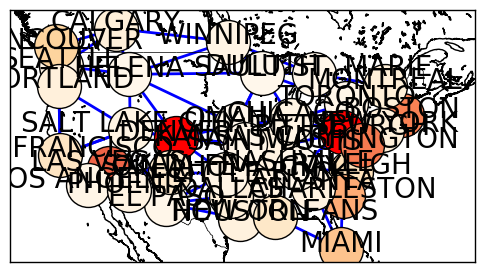

In [5]:
data2 = {}

data2['TORONTO'] = 12
data2['OMAHA'] = 2
data2['BOSTON'] = 532
data2['LITTLE ROCK'] = 39
data2['SAINT LOUIS'] = 40
data2['HELENA'] = 4
data2['NEW YORK'] = 70
data2['SALT LAKE CITY'] = 31
data2['RALEIGH'] = 165
data2['HOUSTON'] = 50
data2['DALLAS'] = 61
data2['WINNIPEG'] = 24
data2['EL PASO'] = 15
data2['LAS VEGAS'] = 627
data2['LOS ANGELES'] = 23
data2['CHARLESTON'] = 418
data2['ATLANTA'] = 41
data2['SEATTLE'] = 35
data2['SAULT ST. MARIE'] = 12
data2['CHICAGO'] = 30
data2['MIAMI'] = 333
data2['SANTA FE'] = 106
data2['WASHINGTON'] = 560
data2['KANSAS CITY'] = 14
data2['VANCOUVER'] = 251
data2['CALGARY'] = 68
data2['SAN FRANCISCO'] = 141
data2['PORTLAND'] = 60
data2['PHOENIX'] = 38
data2['NASHVILLE'] = 10
data2['DULUTH'] = 7
data2['NEW ORLEANS'] = 128
data2['OKLAHOMA CITY'] = 24
data2['MONTREAL'] = 73

max_val = 0

for key in data2:
    if max_val < data2[key]:
        max_val = data2[key]

color_data = {}

for key in data2:
    color_data[key] = float(data2[key]) / float(1000)

#print color_data

m = Basemap(
			projection='merc',
			llcrnrlon=-130,
			llcrnrlat=24,
			urcrnrlon=-60,
			urcrnrlat=53,
			lat_ts=0,
			resolution='i',
			suppress_ticks=True)

map_coord = {'VANCOUVER': {'x': 49.564963, 'y': -123.062702},
	'CALGARY': {'x': 51.251020, 'y': -114.026557},
	'WINNIPEG': {'x': 50.010978, 'y': -97.154732},
	'SAULT ST. MARIE': {'x': 46.791630, 'y': -84.286244},
	'MONTREAL': {'x': 45.503987, 'y': -73.568746},
	'SEATTLE': {'x': 47.589454, 'y': -122.318512},
	'TORONTO': {'x': 43.641723, 'y': -79.387558},
	'BOSTON': {'x': 42.355750, 'y': -71.055807},
	'HELENA': {'x': 46.731739, 'y': -112.027148},
	'DULUTH': {'x': 46.888493, 'y': -92.078888},
	'PORTLAND': {'x': 45.509640, 'y': -122.654604},
	'NEW YORK': {'x': 40.692428, 'y': -73.998671},
	'PITTSBURGH': {'x': 40.413313, 'y': -79.993355},
	'CHICAGO': {'x': 41.852272, 'y': -87.629942},
	'OMAHA': {'x': 41.254117, 'y': -95.997963},
	'WASHINGTON': {'x': 38.894640, 'y': -77.042346},
	'SAINT LOUIS': {'x': 38.622955, 'y': -90.200017},
	'KANSAS CITY': {'x': 39.094362, 'y': -94.586185},
	'DENVER': {'x': 39.728466, 'y': -104.989352},
	'SALT LAKE CITY': {'x': 40.751569, 'y': -111.902025},
	'SAN FRANCISCO': {'x': 37.779881, 'y': -122.428586},
	'RALEIGH': {'x': 35.775136, 'y': -78.638468},
	'NASHVILLE': {'x': 36.179663, 'y': -86.791265},
	'LITTLE ROCK': {'x': 34.755320, 'y': -92.290129},
	'OKLAHOMA CITY': {'x': 35.473889, 'y': -97.508375},
	'SANTA FE': {'x': 35.687297, 'y': -105.935572},
	'LAS VEGAS': {'x': 36.174911, 'y': -115.146240},
	'LOS ANGELES': {'x': 34.073030, 'y': -118.276788},
	'PHOENIX': {'x': 33.447244, 'y': -112.071539},
	'EL PASO': {'x': 31.751809, 'y': -106.488188},
	'DALLAS': {'x': 32.757476, 'y': -96.792232},
	'ATLANTA': {'x': 33.754522, 'y': -84.391658},
	'CHARLESTON': {'x': 32.791175, 'y': -79.935731},
	'MIAMI': {'x': 25.763988, 'y': -80.193837},
	'NEW ORLEANS': {'x': 29.985846, 'y': -90.082514},
	'HOUSTON': {'x': 29.829152, 'y': -95.365634}}

A = loadgraphfromfile('usa.txt')

pos = {}
pos_label = {}
for x in map_coord:
	pos[x] = m(map_coord[x]['y'], map_coord[x]['x'])
	pos_label[x] = (pos[x][0], pos[x][1] + 100000.0)

m.drawcoastlines()
m.drawcountries()
#m.drawstates()

# nodes
for node in A:
    G = nx.Graph()
    if node in color_data:
        G.add_node(node)
        color = pylab.cm.OrRd(color_data[node])
        c = [color[0], color[1], color[2], color[3]]
        nx.draw_networkx_nodes(G,pos,node_size=1000, node_color=c)
    else:
        G.add_node(node)
        nx.draw_networkx_nodes(G,pos,node_size=1000, node_color='#ff0000')
        
nx.draw_networkx_edges(A,pos,edgelist=A.edges(),width=2,edge_color='#0000ff')
nx.draw_networkx_labels(A,pos=pos_label,font_size=20,font_family='sans-serif')

plt.show()

In [ ]:
A = loadgraphfromfile

In [ ]:
data3 = {}

#data2['TORONTO'] = 4039
#data2['OMAHA'] = 319
#data2['PITTSBURGH'] = 1169
#data2['BOSTON'] = 3250
#data2['LITTLE ROCK'] = 2764
#data2['SAINT LOUIS'] = 2236
#data2['HELENA'] = 1964
#data2['NEW YORK'] = 1509
#data2['SALT LAKE CITY'] = 4308
#data2['RALEIGH'] = 2259
#data2['HOUSTON'] = 238
#data2['DALLAS'] = 818
#data2['DENVER'] = 391
#data2['WINNIPEG'] = 4112
#data2['EL PASO'] = 1098
#data2['LAS VEGAS'] = 8133
#data2['LOS ANGELES'] = 1859
#data2['CHARLESTON'] = 1916
#data2['ATLANTA'] = 289
#data2['SEATTLE'] = 817
#data2['SAULT ST. MARIE'] = 4205
#data2['CHICAGO'] = 1775
#data2['MIAMI'] = 5062
#data2['SANTA FE'] = 4029
#data2['WASHINGTON'] = 8981
#data2['KANSAS CITY'] = 815
#data2['VANCOUVER'] = 1222
#data2['CALGARY'] = 3162
#data2['SAN FRANCISCO'] = 4706
#data2['PORTLAND'] = 935
#data2['PHOENIX'] = 2062
#data2['NASHVILLE'] = 227
#data2['DULUTH'] = 3062
#data2['NEW ORLEANS'] = 3376
#data2['OKLAHOMA CITY'] = 3104
#data2['MONTREAL'] = 1344
data2['TORONTO']=117
data2['OMAHA']=33
data2['PITTSBURGH']=52
data2['BOSTON']=516
data2['LITTLE ROCK']=119
data2['SAINT LOUIS']=130
data2['HELENA']=164
data2['NEW YORK']=181
data2['SALT LAKE CITY']=338
data2['RALEIGH']=289
data2['HOUSTON']=98
data2['DALLAS']=92
data2['DENVER']=87
data2['EL PASO']=200
data2['LAS VEGAS']=722
data2['LOS ANGELES']=185
data2['CHARLESTON']=402
data2['ATLANTA']=89
data2['SEATTLE']=115
data2['SAULT ST. MARIE']=238
data2['CHICAGO']=171
data2['MIAMI']=522
data2['SANTA FE']=326
data2['WASHINGTON']=614
data2['KANSAS CITY']=53
data2['VANCOUVER']=242
data2['CALGARY']=328
data2['SAN FRANCISCO']=435
data2['PORTLAND']=133
data2['NEW ORLEANS']=356
data2['PHOENIX']=224
data2['NASHVILLE']=50
data2['DULUTH']=174
data2['WINNIPEG']=464
data2['OKLAHOMA CITY']=209
data2['MONTREAL']=145

max_val = 0

for key in data2:
    if max_val < data2[key]:
        max_val = data2[key]

color_data = {}

for key in data2:
    color_data[key] = float(data2[key]) / float(1000)

#print color_data

m = Basemap(
			projection='merc',
			llcrnrlon=66,
			llcrnrlat=8,
			urcrnrlon=95,
			urcrnrlat=35,
			lat_ts=0,
			resolution='i',
			suppress_ticks=True)
22.727546, 79.521207

map_coord = {'PESHAWAR': {'x': 34.008629, 'y': 71.578487},
'LAHORE': {'x': 31.527829, 'y': 74.216999},
'JACOBABAD': {'x': 28.278489, 'y': 68.436391},
'BHATINDA': {'x': 30.147691, 'y': 74.972270},
'AMBALA': {'x': 30.371905, 'y': 76.783675},
'ROHRI': {'x': 27.692858, 'y': 68.897847},
'DELHI': {'x': 28.661815, 'y': 77.227369},
'BAREILLY': {'x': 28.358337, 'y': 79.434667},
'KARACHI': {'x': 24.861262, 'y': 67.011701},
'JODHPUR': {'x': 26.234199, 'y': 73.026218},
'JAIPUR': {'x': 26.894785, 'y': 75.791482},
'AGRA': {'x': 27.172029, 'y': 78.008780},
'LUCKNOW': {'x': 26.836016, 'y': 80.948693},
'KATNI': {'x': 23.830551, 'y': 80.407781},
'PATNA': {'x': 25.595421, 'y': 85.139663},
'DHUBRI': {'x': 26.020548, 'y': 89.974609},
'JARHAT': {'x': 26.746636, 'y': 94.202739},
'CHITTAGONG': {'x': 22.346473, 'y': 91.811160},
'CALCUTTA': {'x': 22.571802, 'y': 88.366185},
'BILASPUR': {'x': 22.079330, 'y': 82.139259},
'BHOPAL': {'x': 23.260081, 'y': 77.414719},
'RATIAM': {'x': 24.929406, 'y': 75.596563},
'AHMADABAD': {'x': 23.022953, 'y': 72.575660},
'KHANDWA': {'x': 21.823773, 'y': 76.357604},
'RAIPUR': {'x': 21.243212, 'y': 81.634318},
'BOMBAY': {'x': 19.064726, 'y': 72.874630},
'MANMAD': {'x': 20.250882, 'y': 74.436678},
'INDUR': {'x': 17.370836, 'y': 77.616882},
'WALTAIN': {'x': 17.689999, 'y': 83.219780},
'BEZWADA': {'x': 16.506134, 'y': 80.648237},
'WADI': {'x': 17.062367, 'y': 76.981762},
'POONA': {'x': 18.515333, 'y': 73.862467},
'MORMUGAU': {'x': 15.387433, 'y': 73.815384},
'GUNTAKAL': {'x': 15.167241, 'y': 77.373602},
'MADRAS': {'x': 13.081803, 'y': 80.278381},
'MANGALORE': {'x': 12.912343, 'y': 74.857259},
'ERODE': {'x': 11.342650, 'y': 77.717475},
'CALICUT': {'x': 11.256358, 'y': 75.784735},
'QUILON': {'x': 8.892935, 'y': 76.613921}}

A = loadgraphfromfile('india.txt')

pos = {}
pos_label = {}
for x in map_coord:
	pos[x] = m(map_coord[x]['y'], map_coord[x]['x'])
	pos_label[x] = (pos[x][0], pos[x][1] + 100000.0)

m.drawcoastlines()
m.drawcountries()
#m.drawstates()

# nodes
for node in A:
    G = nx.Graph()
    if node in color_data:
        G.add_node(node)
        #color = pylab.cm.OrRd(color_data[node])
        #c = [color[0], color[1], color[2], color[3]]
        nx.draw_networkx_nodes(G,pos,node_size=1000, node_color='#ff0000')
    else:
        G.add_node(node)
        nx.draw_networkx_nodes(G,pos,node_size=1000, node_color='#ff0000')
        
nx.draw_networkx_edges(A,pos,edgelist=A.edges(),width=2,edge_color='#0000ff')
nx.draw_networkx_labels(A,pos=pos_label,font_size=20,font_family='sans-serif')

plt.show()